In [1]:
import numpy as np

a) First I'll analytically find the density of states. I'll treat the parameter space as a 4D "volume". Surfaces of constant energy will be ellipsoids.


\begin{equation}
\frac{p_x^2 + p_y^2}{2m} + \frac{1}{2} m \omega^2 (x^2 + y^2) \leq E.
\end{equation}

A general 4D hyper-ellipsoid of the form

\begin{equation}
\frac{x_1^2}{a_1^2} + \frac{x_2^2}{a_2^2} + \frac{x_3^2}{a_3^2} + \frac{x_4^2}{a_4^2} \leq 1
\end{equation}

has a volume

\begin{equation}
V_4 = \frac{\pi^2}{2} a_1 a_2 a_3 a_4.
\end{equation}

For our system, the energy condition can be rewritten as:

\begin{equation}
\frac{x^2 + y^2}{(E/m\omega^2)} + \frac{p_x^2 + p_y^2}{(2mE)} \leq 1.
\end{equation}

Applying the volume formula:

\begin{equation}
\Omega(E) = \frac{\pi^2}{2} \cdot \left(\frac{E}{m\omega^2}\right) \cdot \left(\frac{E}{m\omega^2}\right) \cdot \left(2mE\right) \cdot \left(2mE\right).
\end{equation}


\begin{equation}
= 2\pi^2 \frac{E^2}{\omega^4}.
\end{equation}


The density of states is given by:

\begin{equation}
g(E) = \frac{d\Omega}{dE}.
\end{equation}

Differentiating,

\begin{equation}
g(E) = \frac{d}{dE} \left( 2\pi^2 \frac{E^2}{\omega^4} \right).
\end{equation}

\begin{equation}
= 4\pi^2 \frac{E}{\omega^4}.
\end{equation}


Now we calculate this expression: 

\begin{equation}
Z(\beta) = \int_{0}^{\infty} g(E) e^{-\beta E} \,dE 
\end{equation}

Doing some simple integration by parts gives:

\begin{equation}
Z(\beta) = 4 \pi^2 / \beta^2 \omega^4 
\end{equation}


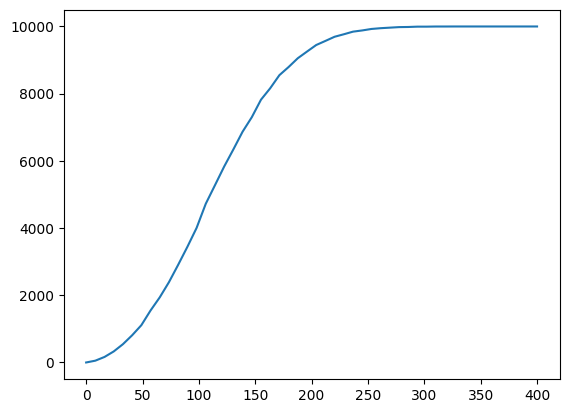

In [6]:
#now calculating DOS numerically. I'll make a 4D array of values, then count how many are below energy E. I won't worry about all the constants for this, I"ll just confirm DOS goes linearly with E
import matplotlib.pyplot as plt

N =10

x , y, px, py = np.arange(N), np.arange(N), np.arange(N), np.arange(N)

Ematrix = np.zeros((N,N,N,N))

for i in range(N):
    for j in range(N):
        for k in range(N):
            for l in range(N):
                Ematrix[i][j][k][l] = px[i]**2 + py[j]**2 + x[k]**2 + y[l]**2


Evals = np.linspace(0,400, num =50)
state_V = []

for E in Evals:
    sV = (Ematrix < E).sum()
    state_V.append(sV)


plt.plot(Evals, state_V)

It is indeed linear, if we ignore artifacts from not enough voxels near the origin, and extending past the boundary at higher E values.

(array([ 24.,  58., 105., 110., 150., 198., 219., 285., 323., 321., 334.,
        426., 456., 485., 519., 458., 512., 502., 474., 444., 435., 382.,
        373., 374., 303., 292., 244., 196., 188., 151., 122., 101.,  98.,
         75.,  63.,  60.,  35.,  35.,  22.,  15.,   5.,  11.,   4.,   6.,
          1.,   2.,   0.,   3.,   0.,   1.]),
 array([  0.2717494 ,   4.07560121,   7.87945301,  11.68330482,
         15.48715663,  19.29100843,  23.09486024,  26.89871204,
         30.70256385,  34.50641566,  38.31026746,  42.11411927,
         45.91797107,  49.72182288,  53.52567469,  57.32952649,
         61.1333783 ,  64.9372301 ,  68.74108191,  72.54493372,
         76.34878552,  80.15263733,  83.95648913,  87.76034094,
         91.56419275,  95.36804455,  99.17189636, 102.97574816,
        106.77959997, 110.58345178, 114.38730358, 118.19115539,
        121.9950072 , 125.798859  , 129.60271081, 133.40656261,
        137.21041442, 141.01426623, 144.81811803, 148.62196984,
        152.425821

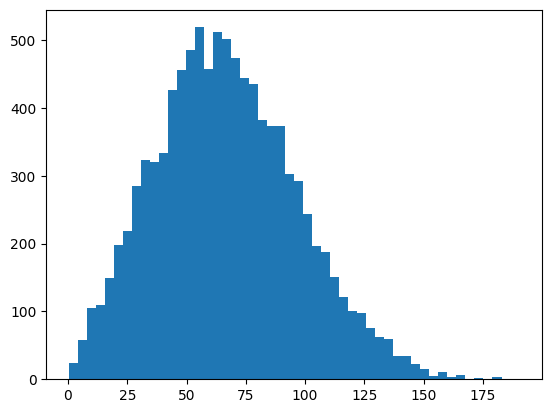

In [9]:
#c)

#I'm going to try something new, to numerically find the density of states I'll literally just pick random values


def Hamiltonian(px, py, x, y, lambd, m, omega):
    return (px**2 + py**2)/(2*m) +(m*omega**2 / 2)*(x**2 + y**2) + lambd*(x**2 + y**2)**2


Elist = []
for i in range(10000):
    px = np.random.rand()*10     #number randomly distributed between 0 and 10
    py = np.random.rand()*10
    x = np.random.rand()*10
    y = np.random.rand()*10

    Elist.append(Hamiltonian(px, py, x, y, 0.0, 1, 1))       #setting lambda to 0 to confirm linear behavior for part a)


plt.hist(Elist, bins=50)



(array([ 23.,  38.,  65.,  78.,  77.,  71., 104.,  91.,  82., 102., 109.,
        110., 123., 138., 129., 138., 151., 156., 174., 162., 161., 176.,
        195., 189.]),
 array([ 0.        ,  2.08333333,  4.16666667,  6.25      ,  8.33333333,
        10.41666667, 12.5       , 14.58333333, 16.66666667, 18.75      ,
        20.83333333, 22.91666667, 25.        , 27.08333333, 29.16666667,
        31.25      , 33.33333333, 35.41666667, 37.5       , 39.58333333,
        41.66666667, 43.75      , 45.83333333, 47.91666667, 50.        ]),
 <BarContainer object of 24 artists>)

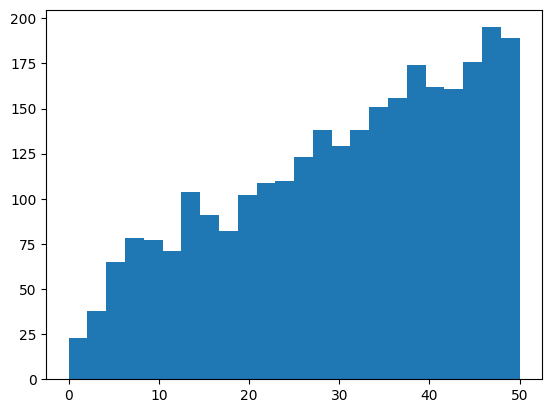

In [12]:
Elist = []
for i in range(100000):
    px = np.random.rand()*10     #number randomly distributed between 0 and 10
    py = np.random.rand()*10
    x = np.random.rand()*10
    y = np.random.rand()*10

    Elist.append(Hamiltonian(px, py, x, y, 1, 1, 1))       

binsss = np.linspace(0,50,25)

plt.hist(Elist, bins=binsss)

The density of states is now a decreasing function. Important to keep in mind that only small values for E can be trusted, because at high values of E there might be values of px, py, x and y, that do get those energies that fall outside the ranges of values we used.

In this case, the cutoff where we for sure accounted for everything is H(px = 10, py=0, x=0, y=0) = 50. The histogram still looks fairly linear, but I can see it level off as the lambda terms start to matter for larger x and y.

I derived this Lagrangian for the double pendulum.

\begin{equation}
L = \frac{1}{2} m L^2 \left( \dot{\theta}_1^2 + \dot{\theta}_2^2 + 2 \dot{\theta}_1 \dot{\theta}_2 \cos(\theta_1 - \theta_2) \right) + mgL \left( \cos\theta_1 + \cos\theta_2 \right).
\end{equation}



Then applying the Lagrangian equations I get:

\begin{equation}
\begin{bmatrix}
1 & \cos(\theta_1 - \theta_2) \\
\cos(\theta_1 - \theta_2) & 1
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}_1 \\
\ddot{\theta}_2
\end{bmatrix}
+
mL^2
\begin{bmatrix}
0 & -\sin(\theta_1 - \theta_2) \dot{\theta}_2 \\
\sin(\theta_1 - \theta_2) \dot{\theta}_1 & 0
\end{bmatrix}
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2
\end{bmatrix}
+
mgL
\begin{bmatrix}
\sin\theta_1 \\
\sin\theta_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}.
\end{equation}